In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import collections
from scipy.integrate import odeint

# Model 1

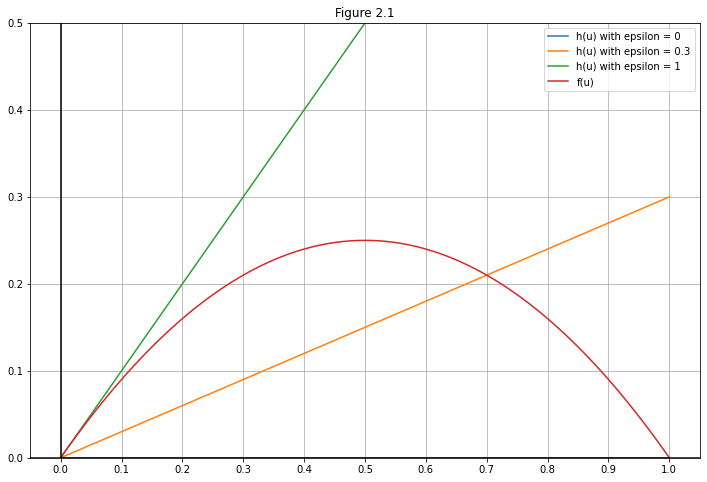

In [6]:
fig, ax = plt.subplots(figsize = (12,8))
u = numpy.linspace(0,1,100)
f = u*(1-u)
e = [0,0.3, 1]

for es in e:  
    g = es*u
    plt.plot(u,g, label = f'h(u) with epsilon = {es}');
plt.plot(u,f, label = 'f(u)');
plt.ylim(0,0.5);
ax.grid(True, which='both');
plt.xticks(np.arange(0,max(u)+0.1,0.1))
ax.axhline(y=0, color='k');
ax.axvline(x=0, color='k');
plt.legend(loc='best');
plt.title('Figure 2.1');

## Transcritical Bifurcation Plot

In [7]:
def bifurcation_plot(f,f_x,r,x,rlabel='r'):
    """ produce a bifurcation diagram for a function f(r,x) given
        f and its partial derivative f_x(r,x) over a domain given by numpy arrays r and x
        
        f(r,x)  :  RHS function of autonomous ode dx/dt = f(r,x)
        f_x(r,x):  partial derivative of f with respect to x
        r       :  numpy array giving r coordinates of domain
        x       :  numpy array giving x coordinates of domain
        rlabel  :  string for x axis parameter label
    """
    # set up a mesh grid and extract the 0 level set of f
    R,X = numpy.meshgrid(r,x)
    fig, ax = plt.subplots(figsize = (12,8));
    CS = plt.contour(R,X,f(R,X),[0])
    plt.close()
    c0 = CS.collections[0]
    fig, ax = plt.subplots(figsize = (12,8));
    # for each path in the contour extract vertices and mask by the sign of df/dx
    for path in c0.get_paths():
        vertices = path.vertices
        vr = vertices[:,0]
        vx = vertices[:,1]
        
        mask = numpy.sign(f_x(vr,vx))
        stable = mask < 0.
        unstable = mask > 0.

        # plot the stable and unstable branches for each path
        plt.plot(vr[stable],vx[stable], 'b')
        plt.plot(vr[unstable],vx[unstable],'b--')   
    plt.xlabel('Parameter {0}'.format(rlabel),fontsize=30)
    plt.ylabel('u', rotation=0, labelpad=10,fontsize=30)
    plt.legend(('Stable','Unstable'),loc='best', title='Stability',prop={"size":20})
    plt.title('Figure 1 - Transcritical bifurcation diagram for model 1',fontsize=30)
    plt.xlim(0,2)
    plt.ylim(-0.5,2)
    #ax.grid(True, which='both');
    plt.xticks(np.arange(0,2,1))
    plt.yticks(np.arange(0,2,1))
    #ax.axhline(y=0, color='k');
    ax.axvline(x=0, color='k');
    ax.text(0.2, 0.9, r'$u_1$', fontsize=30)
    ax.text(0.2, 0.1, r'$u_0$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=20)

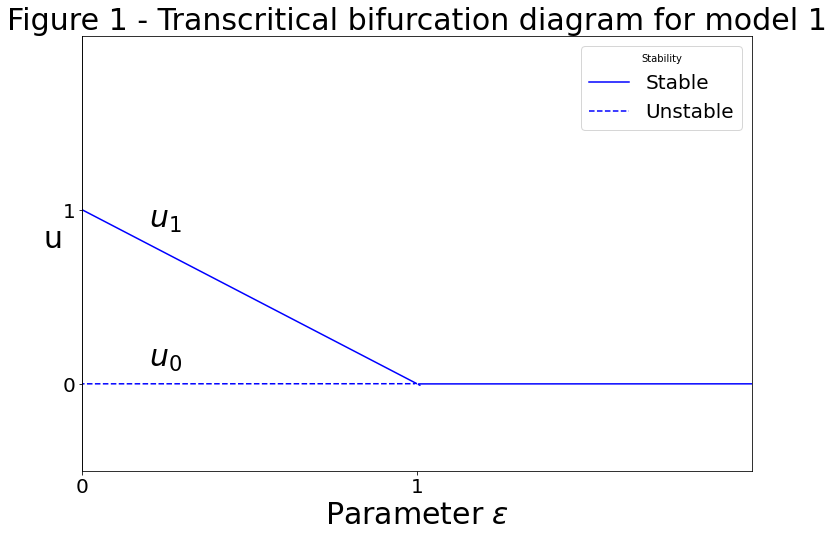

In [8]:
f = lambda r,x: x - x*x - r*x
f_x = lambda r,x: 1. - 2.*x - r

x = numpy.linspace(-0.01,4,1000)
r = numpy.linspace(-0.01,4,1000)

bifurcation_plot(f,f_x,r,x, rlabel=r"$\epsilon$")

## Yield

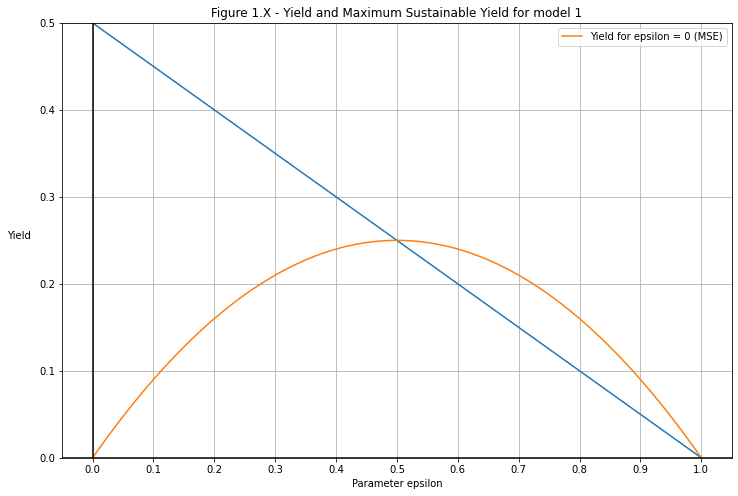

In [100]:
fig, ax = plt.subplots(figsize = (12,8))
u = numpy.linspace(0,1,100)
e = [0.5]
plt.plot(u, 0.5*(1 - u))
Y = (u*(1-u))
plt.plot(u,Y, label = f'Yield for epsilon = {es} (MSE)');

plt.ylim(0,0.5);
ax.grid(True, which='both');
plt.xticks(np.arange(0,max(u)+0.1,0.1))
ax.axhline(y=0, color='k');
ax.axvline(x=0, color='k');
plt.legend(loc='best');
plt.xlabel('Parameter epsilon')
plt.ylabel('Yield', rotation=0,labelpad=20)
plt.title('Figure 1.X - Yield and Maximum Sustainable Yield for model 1');

## Logistic growth model 1

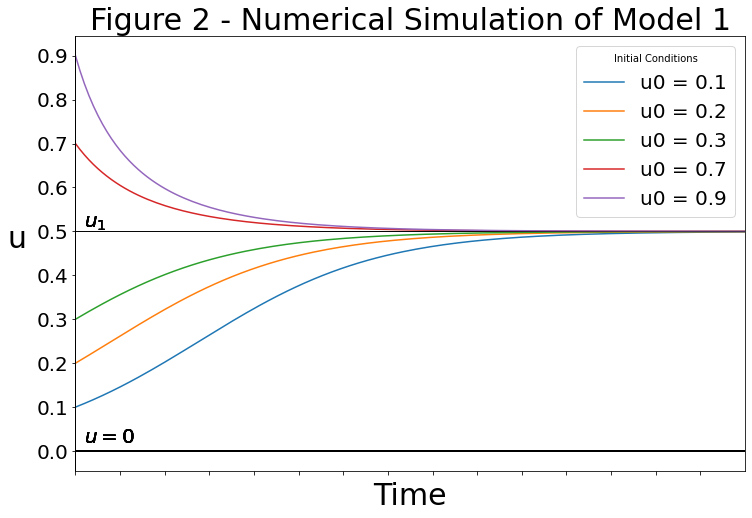

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Function that passes in one initial condition at a time. Then plots a line for that given IC.
def logistic_functions(u0):
    # Function to calculate ODE for given initial conditions, time and parameters.
    def sim(variables,t,params):
        # Define variables and parameters locally.
        u = variables[0]
        e = params[0]
        
        #Equation to solve.
        dudt = u * (1 - u) - e*u
        return dudt
    
    t = np.linspace(0,15,num=150)
    f = odeint(sim,u0, t, args=(params,))
    plt.plot(t,f[:,0], label='u0 = %s'%u0)
    plt.xlabel("Time",fontsize=30)
    plt.ylabel("u",fontsize=30,rotation = 0, labelpad = 20)
    plt.legend()
    plt.xlim(0,15)
    #ax.grid(True, which='both');
    plt.xticks(np.arange(0,15,1))
    plt.yticks(np.arange(0,1,0.1),fontsize=20)
    ax.axhline(y=0, color='k');
    ax.axvline(x=0, color='k');
    plt.plot([0,15],[0.5,0.5],color='k',linewidth=0.5)
    ax.text(0.2,0.51,r'$u_1$',fontsize=20)
    ax.text(0.2,0.02,r'$u=0$',fontsize=20)
    ax.set_xticklabels([])
    
fig, ax = plt.subplots(figsize = (12,8))

u0 = [0.1, 0.2, 0.3, 0.7, 0.9]
e = 0.5
params = [e]

for us in u0:
    logistic_functions(us)
    
plt.legend(loc='best',title='Initial Conditions', prop={"size":20});
plt.title('Figure 2 - Numerical Simulation of Model 1',fontsize=30);

# Model 2

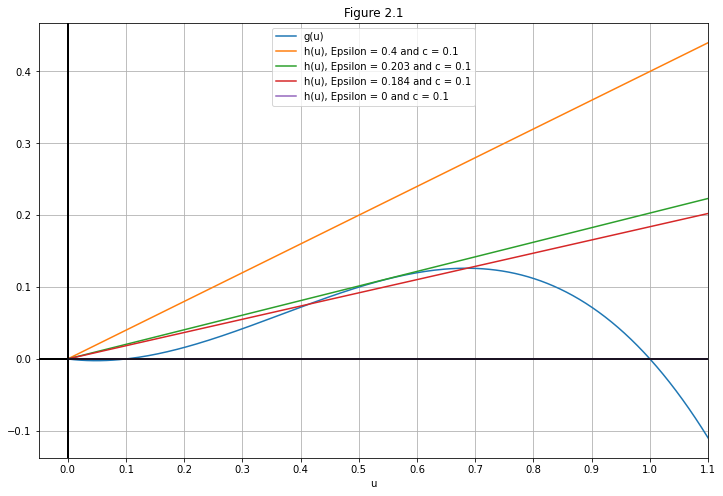

In [110]:
def create_plot(c):
    fig, ax = plt.subplots(figsize = (12,8))
    e = [0.4, ((c-1)/2)**2 , ((c**2 - 4*c + 1) + (c**4 + c**3 + c + 1)**(1/2))/9, 0]
    u = numpy.linspace(0,1.1,200)
    g = u * (u - c) * (1 - u)
    plt.plot(u,g, label = 'g(u)');
    for es in e:
        if es >= 0:
            e_rounded = round(es, 3)
            h = e_rounded*u
            plt.plot(u,h, label = f"h(u), Epsilon = {e_rounded} and c = {c}");
            #ax.set_aspect(4);
            ax.grid(True, which='both');
            plt.xticks(np.arange(0,1.2,0.1))
            ax.axhline(y=0, color='k');
            ax.axvline(x=0, color='k');
            plt.legend(loc='upper center');
            plt.xlabel('u')
            plt.xlim(-0.05,1.1)
            plt.title('Figure 2.1')
        else:
            plt.clf()

cs = [0.1]
#cs = np.linspace(0,1, 51)
for c in cs:
    create_plot(c)
    
#e = [0,(2/9),0.1235,0.15]

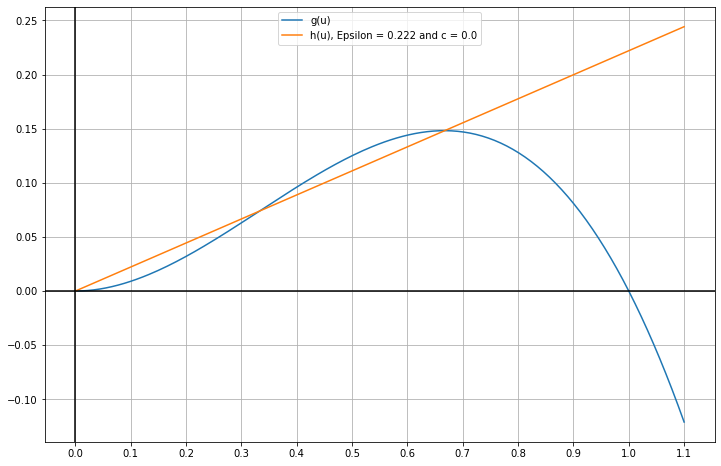

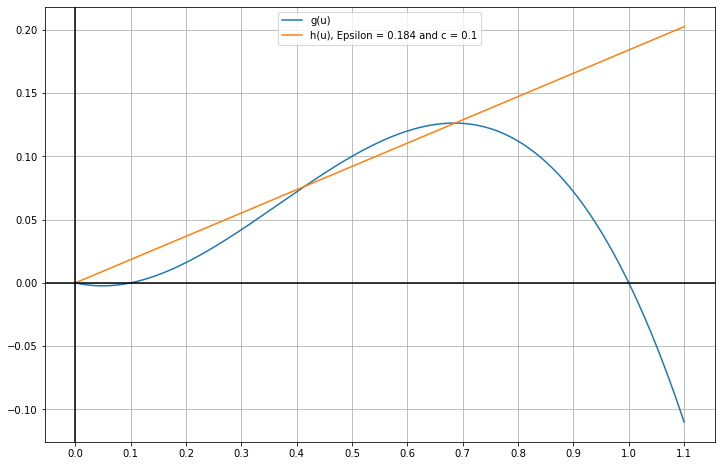

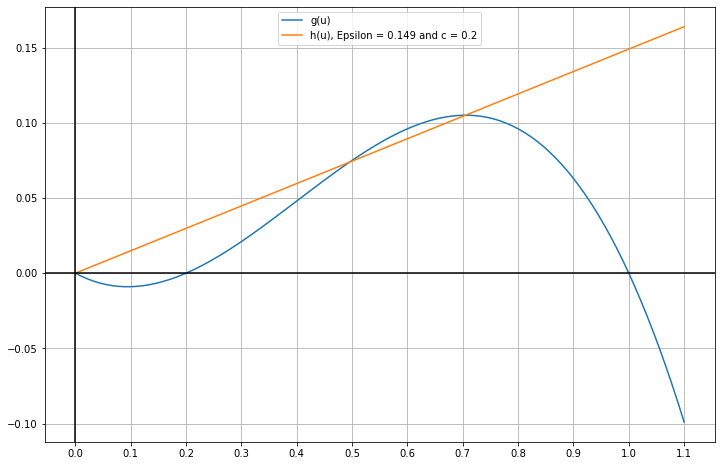

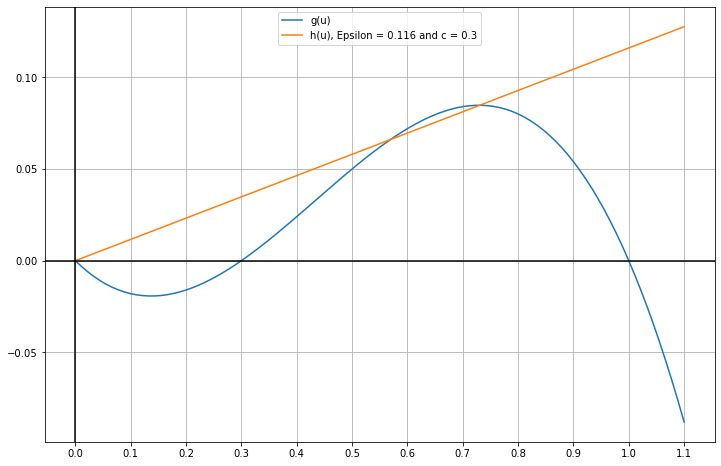

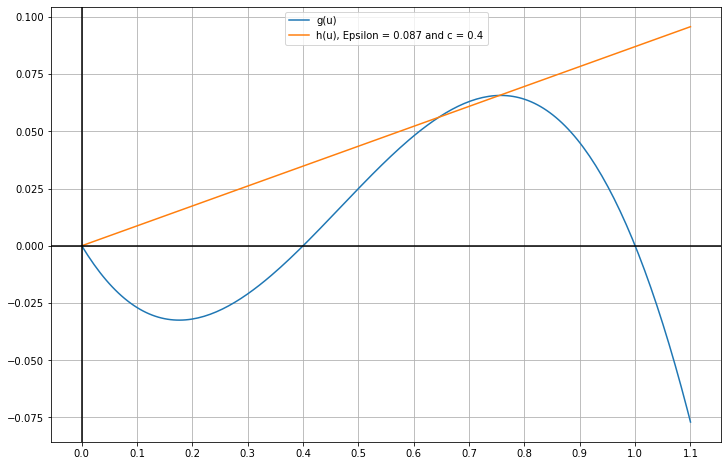

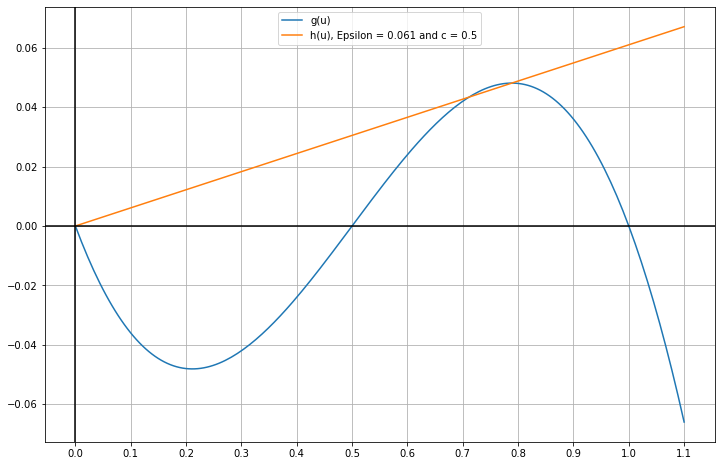

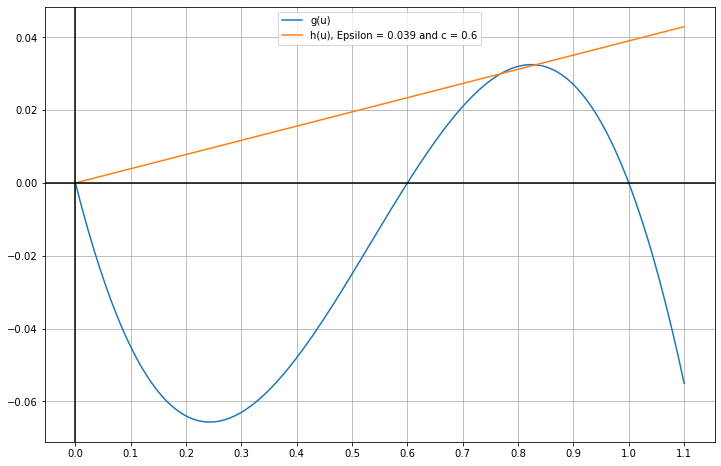

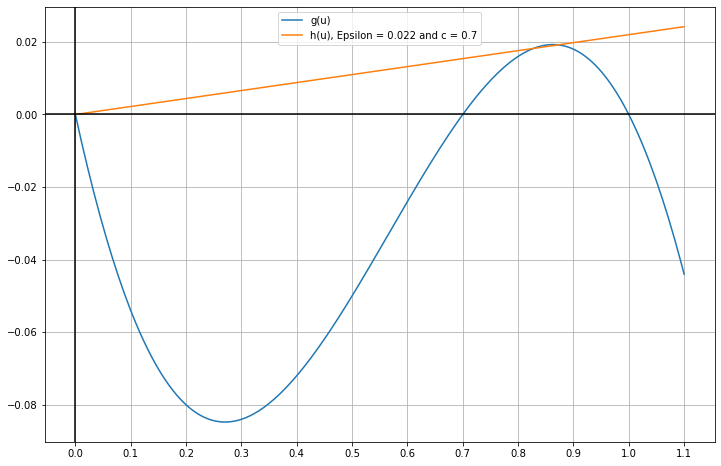

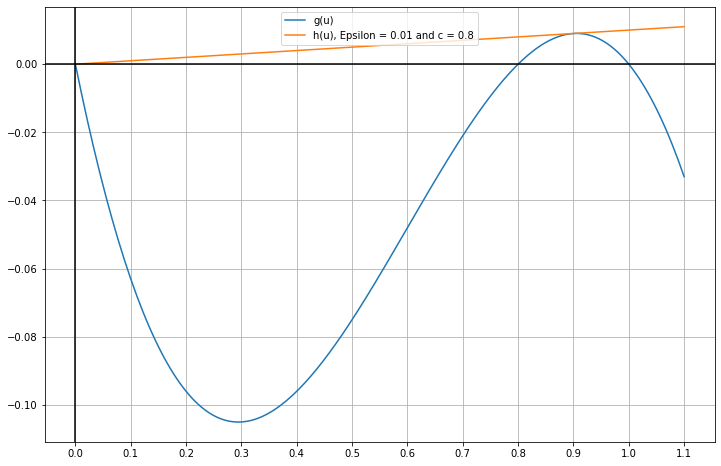

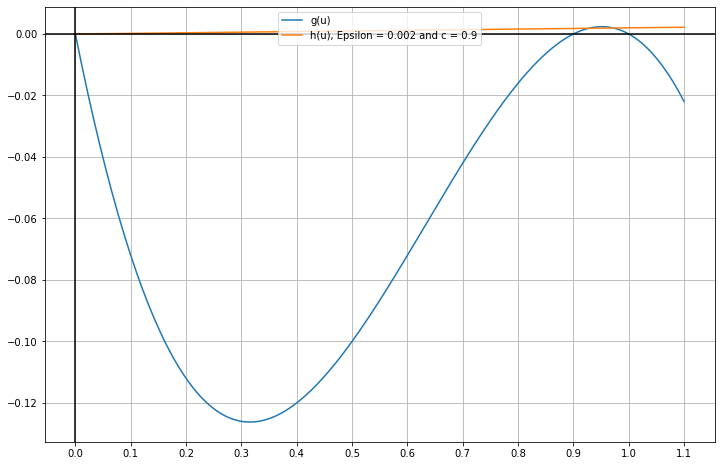

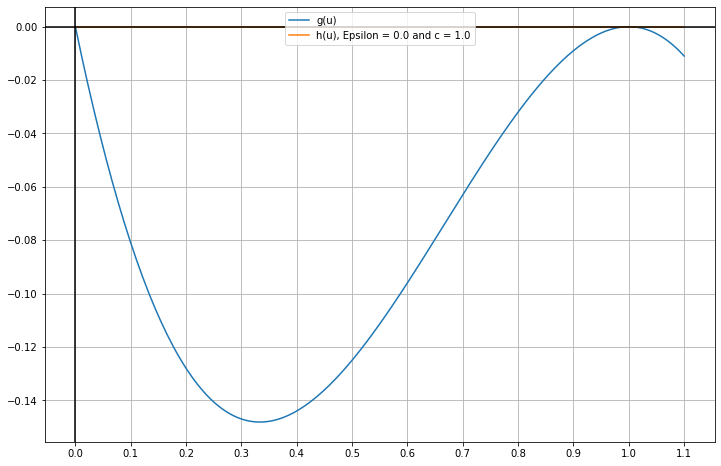

In [102]:
def create_MSY_plots(c):
    fig, ax = plt.subplots(figsize = (12,8))
    e = [((c**2 - 4*c + 1) + (numpy.sqrt(c**4 + c**3 + c + 1)) / 9]
    u = numpy.linspace(0,1.1,200)
    g = u * (u - c) * (1 - u)
    plt.plot(u,g, label = 'g(u)');
    for es in e:
        if es >= 0:
            e_rounded = round(es, 3)
            h = e_rounded*u
            plt.plot(u,h, label = f'h(u), Epsilon = {e_rounded} and c = {c}');
            #ax.set_aspect(4);
            ax.grid(True, which='both');
            plt.xticks(np.arange(0,1.2,0.1))
            ax.axhline(y=0, color='k');
            ax.axvline(x=0, color='k');
            plt.legend(loc='upper center');
        else:
            plt.clf()

cs = np.linspace(0,1, 11)
for c in cs:
    create_MSY_plots(round(c, 1))
    
#e = [0,(2/9),0.1235,0.15]

## Bifurction Diagram for model 2

In [10]:
import numpy
def bifurcation_plot(f,f_x,r,x,rlabel='r'):
    """ produce a bifurcation diagram for a function f(r,x) given
        f and its partial derivative f_x(r,x) over a domain given by numpy arrays r and x
        
        f(r,x)  :  RHS function of autonomous ode dx/dt = f(r,x)
        f_x(r,x):  partial derivative of f with respect to x
        r       :  numpy array giving r coordinates of domain
        x       :  numpy array giving x coordinates of domain
        rlabel  :  string for x axis parameter label
    """
    # set up a mesh grid and extract the 0 level set of f
    R,X = numpy.meshgrid(r,x)
    fig, ax = plt.subplots(figsize = (12,8))
    CS = plt.contour(R,X,f(R,X),[0],colors='k')
    plt.close()
    fig, ax = plt.subplots(figsize = (12,8))
    c0 = CS.collections[0]
    # for each path in the contour extract vertices and mask by the sign of df/dx
    for path in c0.get_paths():
        vertices = path.vertices
        vr = vertices[:,0]
        vx = vertices[:,1]
        mask = numpy.sign(f_x(vr,vx))
        stable = mask < 0.
        unstable = mask > 0.
        
        # plot the stable and unstable branches for each path
        plt.plot(vr[stable],vx[stable],'b')
        plt.plot(vr[unstable],vx[unstable],'b--')
    plt.title('Figure 3 - Saddle-node bifurcation plot for Model 2',fontsize=30)
    plt.xlabel('Parameter {0}'.format(rlabel),fontsize=30)
    plt.ylabel('u', rotation=0, labelpad=20,fontsize=30)
    plt.legend((r'Stable',r'Unstable'),loc='best',prop={"size":20})
    plt.xlim(r[0],r[-1])
    plt.ylim(x[0],x[-1])
    #ax.set_aspect(0.3);
    ax.grid(True, which='major',axis='x');
    plt.xticks(np.arange(0,r[-1],0.2025))
    ax.axhline(y=0, color='k');
    ax.axvline(x=0, color='k');
    xlabels = [item.get_text() for item in ax.get_xticklabels()]
    xlabels[1] = r"$\left(\frac{c - 1}{2}\right)^2$"
    ax.set_xticklabels(xlabels)
    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.text(0.1, 0.8, r'$u_2$', fontsize=30)
    ax.text(0.1, 0.3, r'$u_1$', fontsize=30)

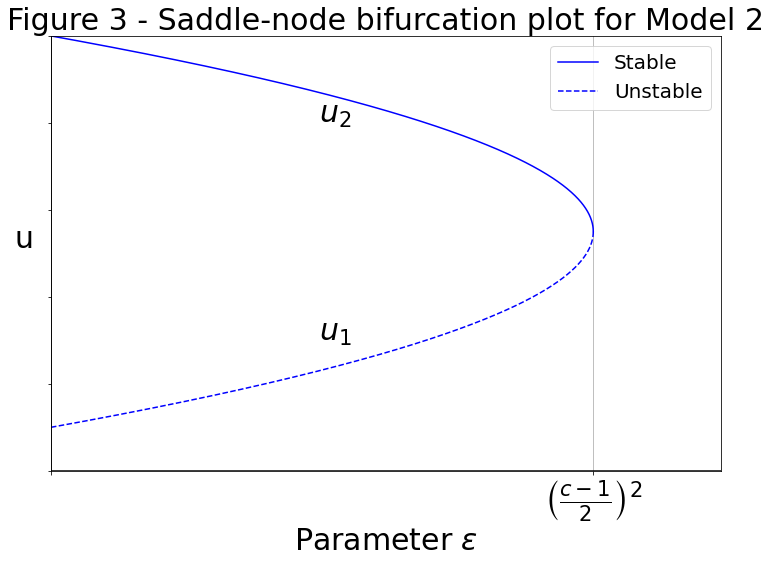

In [11]:
c = 0.1

f = lambda e,u: (u - c) * (1 - u) - e
f_u = lambda e,u: 1. - 2.*u + c
u = numpy.linspace(0,1.,1000)
e = numpy.linspace(0,.25,1000)
    
bifurcation_plot(f,f_u,e,u,rlabel=r"$\epsilon$")

## Logistic growth model 2

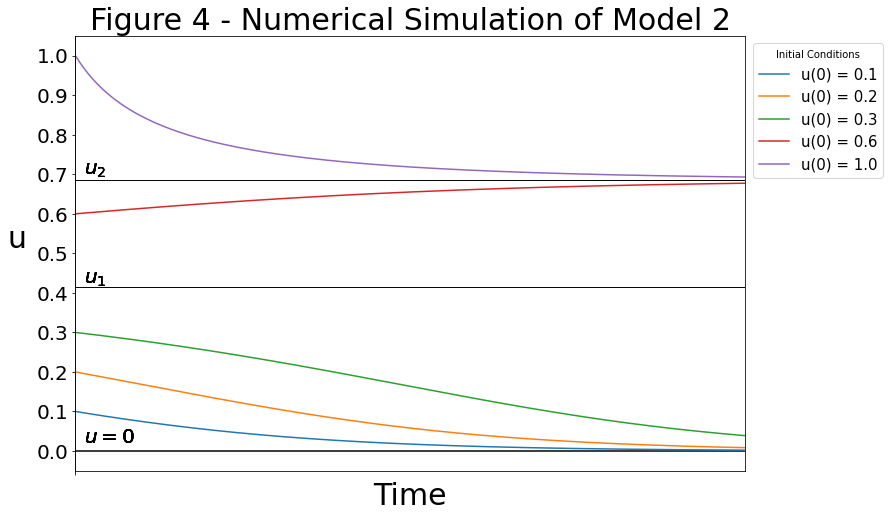

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Function that passes in one initial condition at a time. Then plots a line for that given IC.
def logistic_functions_with_c(u0, c):
    # Function to calculate ODE for given initial conditions, time and parameters.
    def sim(variables,t,params):
        # Define variables and parameters locally.
        u = variables[0]
        e = params[0]
        
        #Equation to solve.
        dudt = (u * (1 - u) * (u - c)) - e*u
        return dudt
    
    t = np.linspace(0,15,num=150)
    f = odeint(sim,u0, t, args=(params,))
    plt.plot(t,f[:,0], label='u(0) = %s'%u0)
    plt.xlabel("Time",fontsize=30)
    plt.ylabel("u",fontsize=30,rotation=0,labelpad=20)
    plt.title('Figure 4 - Numerical Simulation of Model 2',fontsize=30)
    plt.legend()
    plt.xlim(0,15)
    plt.plot([0,15],[0.686,0.686],color='k',linewidth=0.5)
    plt.plot([0,15],[0.414,0.414],color='k',linewidth=0.5)
    plt.yticks(np.arange(0,1.1,0.1), fontsize=20)
    ax.text(0.2,0.7,r'$u_2$',fontsize=20)
    ax.text(0.2,0.423,r'$u_1$',fontsize=20)
    ax.text(0.2,0.02,r'$u=0$',fontsize=20)
    ax.set_xticklabels([])


fig, ax = plt.subplots(figsize = (12, 8))
#ax.set_aspect();
#ax.grid(True, which='both');
plt.xticks(np.arange(0,1,1))
ax.axhline(y=0, color='k');
ax.axvline(x=0, color='k');
c = 0.1
u0 = [0.1, 0.2, 0.3, 0.6, 1.]
# np.arange(0, 1.5, 0.1).tolist()

e = 0.184
params = [e]

for us in u0:
    logistic_functions_with_c(us, c)
    
plt.legend(title='Initial Conditions', loc='best',prop={"size":15},bbox_to_anchor=(1, 1));

# Model 3

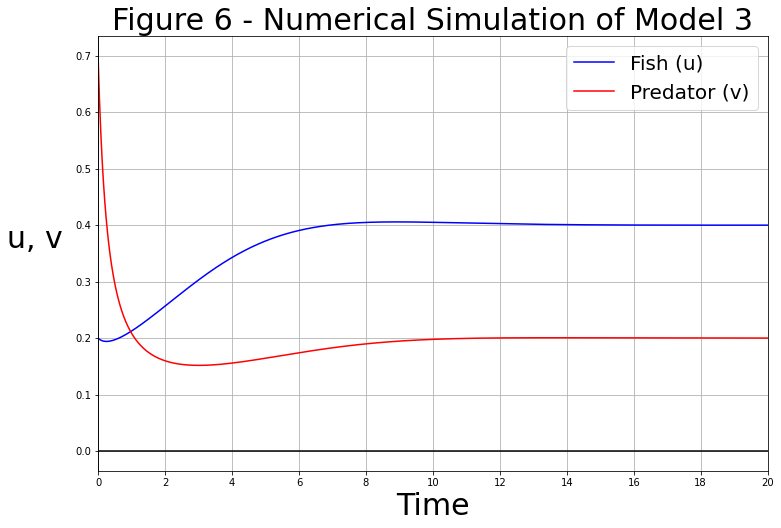

In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint


y0 = [0.2,0.7] # [fish, predator] units in hundreds
l = 20
t = np.linspace(0,l,num=1000)

alpha = 0.5 # p
beta = 0.4 # e
delta = 2. # b
#gamma = 0.6 # c


# steady state initial conditions
# y0 = [gamma/delta , alpha/beta] # [fish, predator] units in hundreds


params = [alpha, beta, delta]

def sim(variables, t, params):

    # fish population level
    x = variables[0]

    # bear population level
    y = variables[1]


    alpha = params[0]
    beta = params[1]
    delta = params[2]
    #gamma = params[3]

    dxdt = x * (1 - x) - beta * x - x * y
    dydt = alpha * y * (1 - ((delta * y) / x))

    return([dxdt, dydt])


y = odeint(sim, y0, t, args=(params,))

fig, ax = plt.subplots(figsize = (12,8))
plt.plot(t,y[:,0], color='b', label='Fish (u)')
plt.plot(t,y[:,1], color='r', label = 'Predator (v)')

#ax.set_aspect(4);
ax.grid(True, which='both');
plt.xticks(np.arange(0,l+1,2))
plt.xlim(0, 20)
ax.axhline(y=0, color='k');
ax.axvline(x=0, color='k');
plt.legend(loc='best',prop={"size":20});
plt.xlabel('Time',fontsize=30)
plt.ylabel('u, v',rotation = 0, labelpad = 40,fontsize=30)
plt.title('Figure 6 - Numerical Simulation of Model 3',fontsize=30)

plt.show()

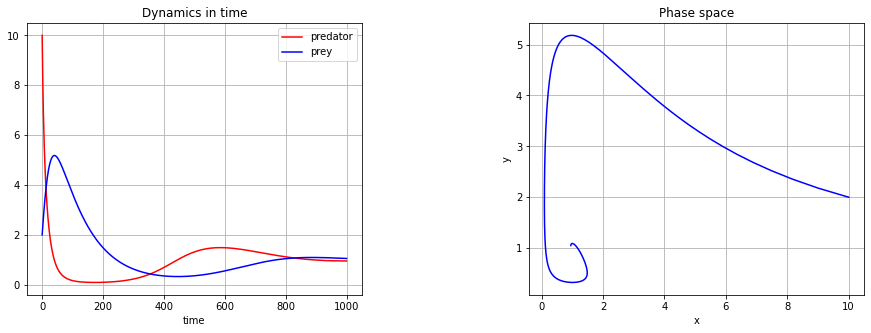

In [15]:
import matplotlib.pyplot as plt
# show plots in notebook


# define system in terms of separated differential equations
def f(x,y):
    return 2*x - x**2 - x*y
def g(x,y):
    return - y + x*y

# initialize lists containing values
x = []
y = []

#iv1, iv2 = initial values, dt = timestep, time = range
def sys(iv1, iv2, dt, time):
    # initial values:
    x.append(iv1)
    y.append(iv2)
    #z.append(iv3)
    # compute and fill lists
    for i in range(time):
        x.append(x[i] + (f(x[i],y[i])) * dt)
        y.append(y[i] + (g(x[i],y[i])) * dt)
        #z.append(z[i] + (h(x[i],y[i],z[i])) * dt)
    return x, y

sys(10, 2, 0.01, 1000)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='predator')
ax1.plot(y, 'b-', label='prey')
#ax1.plot(z, 'g-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()

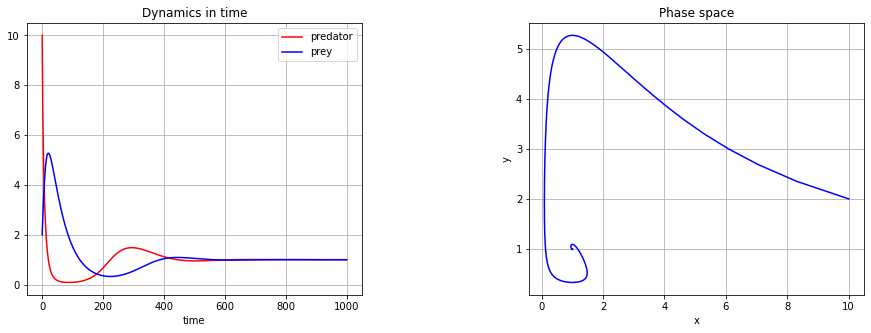

In [20]:
import numpy as np
from scipy import integrate

# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([ 2*X[0] - X[0]**2 - X[0]*X[1] , - X[1] + X[0]*X[1] ])

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 20,  1000)
# initial values: x0 = 10, y0 = 2
Sys0 = np.array([10, 2])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = X.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='predator')
ax1.plot(y, 'b-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()

In [21]:
# brute force: iterate through possibility space (r)
fp = []

def find_fixed_points(r):
    for x in range(r):
        for y in range(r):
            if ((f(x,y) == 0) and (g(x,y) == 0)):
                fp.append((x,y))
                print('The system has a fixed point in %s,%s' % (x,y))
    return fp

find_fixed_points(10)

The system has a fixed point in 0,0
The system has a fixed point in 1,1
The system has a fixed point in 2,0


[(0, 0), (1, 1), (2, 0)]

In [22]:
import sympy as sm
# define the system in this way (asuming a predator-prey-system with no negative values)
# to avoid interference x = r (for resource) and y = c (for consumer) 
r, c = sm.symbols('r, c', negative=False)
R = 2*r - r**2 - r*c
C = - c + r*c

# use sympy's way of setting equations to zero
REqual = sm.Eq(R, 0)
CEqual = sm.Eq(C, 0)

# compute fixed points
equilibria = sm.solve( (REqual, CEqual), r, c )
print(equilibria)

[(0, 0), (1, 1), (2, 0)]


<ipython-input-26-0e26bcebbbcc>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(xlabels)
<ipython-input-26-0e26bcebbbcc>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(ylabels)


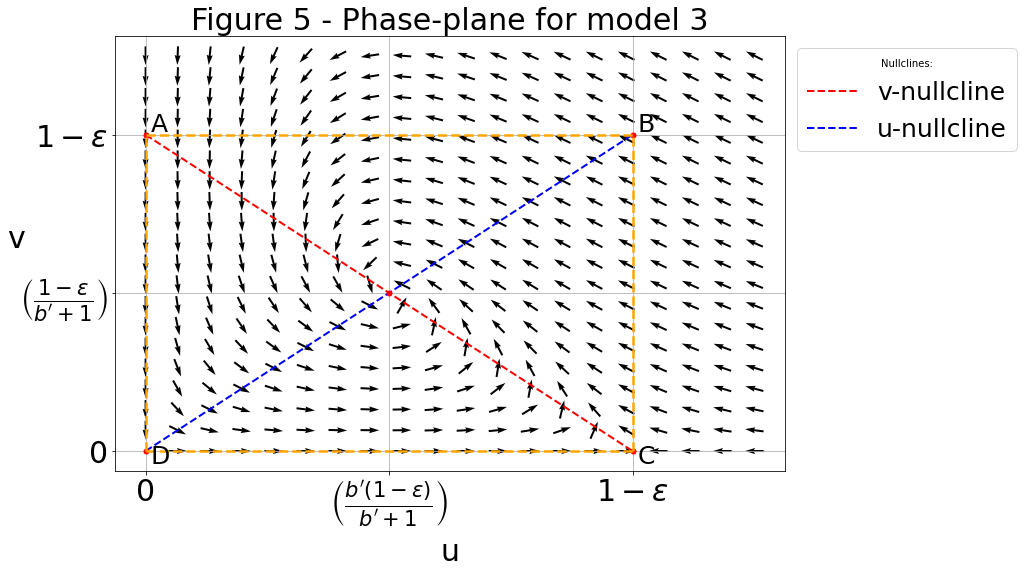

In [26]:
#plot
from IPython.display import display, Math
fig2 = plt.figure(figsize=(12,8))
ax4 = fig2.add_subplot(1,1,1)

x = np.linspace(0,2.5,20)
y = np.arange(0,2.5,20)

# plot nullclines
ax4.plot([0,2],[2,0], 'r--', lw=2, label='v-nullcline')
ax4.plot([0,2],[0,2], 'b--', lw=2, label='u-nullcline')

# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 5.0)
ax4.set_title("Figure 5 - Phase-plane for model 3",fontsize=30)
ax4.legend(title='Nullclines:', bbox_to_anchor=(1., 1))
ax4.plot(0,2,"red",marker="o",markersize=5.0)
ax4.plot(2,2,"red",marker="o",markersize=5.0)
xlabels = [item.get_text() for item in ax4.get_xticklabels()]
xlabels[0],xlabels[1],xlabels[2] = '0', r"$\left(\frac{b'(1 - \epsilon)}{b'+1}\right)$", r"$1 - \epsilon$"
ax4.set_xticklabels(xlabels)
ax4.tick_params(axis='both', which='major', labelsize=30)

ylabels = [item.get_text() for item in ax4.get_yticklabels()]
ylabels[0],ylabels[1],ylabels[2] = '0', r"$\left(\frac{1 - \epsilon}{b'+1}\right)$", r"$1 - \epsilon$"
ax4.set_yticklabels(ylabels)
ax4.tick_params(axis='both', which='major', labelsize=30)
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
ax4.text(0.02, 2.02, r'A', fontsize=25)
ax4.text(2.02, -0.08, r'C', fontsize=25)
ax4.text(2.02, 2.02, r'B', fontsize=25)
ax4.text(0.02, -0.08, r'D', fontsize=25)
ax4.plot([0,2],[2,2],color='orange',linestyle='--',linewidth=2.5)
ax4.plot([2,2],[0,2],color='orange',linestyle='--',linewidth=2.5)
ax4.plot([0,0],[0,2],color='orange',linestyle='--',linewidth=2.5)
ax4.plot([0,2],[0,0],color='orange',linestyle='--',linewidth=2.5)
# quiverplot
# define a grid and compute direction at each point
x = np.linspace(0, 2.5, 20)
y = np.linspace(0, 2.5, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, pivot='mid')
ax4.grid()
ax4.legend(title='Nullclines:', bbox_to_anchor=(1., 1),prop={'size':25});
plt.ylabel('v',fontsize=30,rotation=0);
plt.xlabel('u',fontsize=30,labelpad=10);


In [ ]:
## needed to calculate (complex) squareroots of negative numbers
from scipy import sqrt

def eigenvalues(x,y):
    # 2*x - x**2 - x*y
    a11 = 2 - 2*x - y                # differentiated with respect to x
    a12 = - x                        # differentiated with respect to y
    # - y + x*y
    a21 = y                          # differentiated with respect to x
    a22 = - 1 + x                    # differentiated with respect to y

    tr = a11 + a22
    det = a11*a22 - a12*a21
    lambda1 = (tr - sqrt(tr**2 - 4*det))/2
    lambda2 = (tr + sqrt(tr**2 - 4*det))/2
    print('Check the fixed point  %s, %s' % (x,y)) 
    print('The real part of the first eigenvalue is %s' %lambda1.real)
    print('The real part of the second eigenvalue is %s' % lambda2.real)    
    
    if (lambda1.real < 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a sink. It is stable' % (x,y))
    if (lambda1.real > 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is a source. It is unstable' % (x,y))
    if (lambda1.real > 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a saddle. It is unstable' % (x,y))
    if (lambda1.real < 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is unstable' % (x,y))
    print('----------------------------')
    return lambda1 , lambda2

# iterate through list of fixed points
for x,y in fp:
    eigenvalues(x,y)   

In [137]:
# here again, in order to avoid interference x = r (for resource) and y = c (for consumer) (see above) 

# put equations into matrix-form and compute Jacobian-matrix  
eqMat = sm.Matrix([ R, C ])
Mat = sm.Matrix([ r, c ])
jacMat = eqMat.jacobian(Mat)
print('Jacobian %s' % jacMat)
print('---------------------')

# iterate through list of equilibria
for item in equilibria:
    eqmat = jacMat.subs([ (r, item[0]), (c, item[1]) ])
    print('The eigenvalues for the fixed point (%s, %s) are %s and %s:' 
          %(item[0], item[1], eqmat.eigenvals().keys()[0], eqmat.eigenvals().keys()[1]))
    print('-------------------------------------------')

Jacobian Matrix([[-c - 2*r + 2, -r], [c, r - 1]])
---------------------


TypeError: 'dict_keys' object is not subscriptable

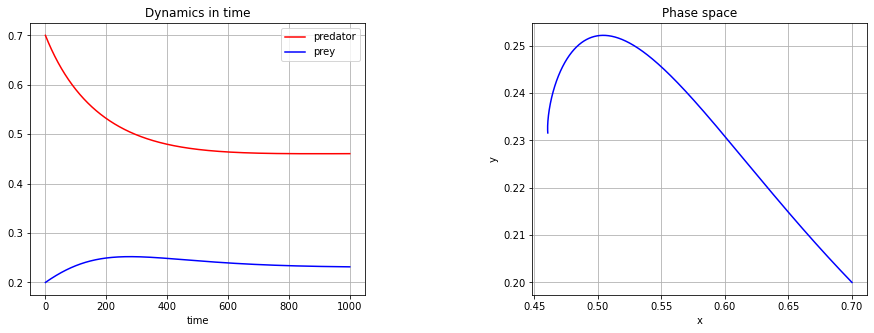

In [463]:
import matplotlib.pyplot as plt
# show plots in notebook

alpha = 0.5 # p
beta = 0.4 # e
delta = 2. # b
gamma = 0.6 # c
# define system in terms of separated differential equations
def f(x,y):
    return x*(1-x) - beta*x - gamma*x*y
def g(x,y):
    return alpha*y*(1 - delta*(y/x))

# initialize lists containing values
x = []
y = []

#iv1, iv2 = initial values, dt = timestep, time = range
def sys(iv1, iv2, dt, time):
    # initial values:
    x.append(iv1)
    y.append(iv2)
    #z.append(iv3)
    # compute and fill lists
    for i in range(time):
        x.append(x[i] + (f(x[i],y[i])) * dt)
        y.append(y[i] + (g(x[i],y[i])) * dt)
        #z.append(z[i] + (h(x[i],y[i],z[i])) * dt)
    return x, y

sys(0.7, 0.2, 0.01, 1000)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='predator')
ax1.plot(y, 'b-', label='prey')
#ax1.plot(z, 'g-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()

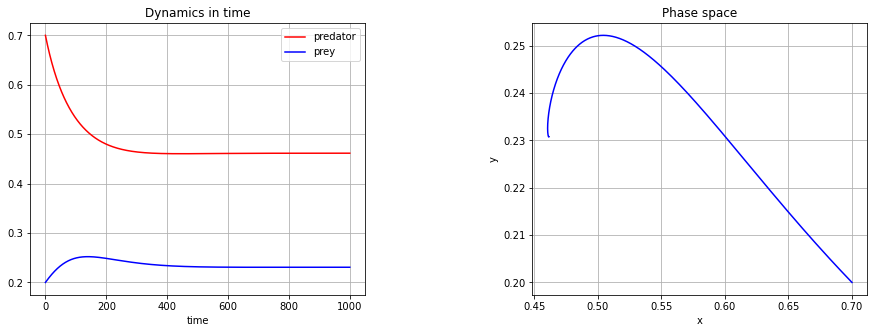

In [464]:
import numpy as np
from scipy import integrate

# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([ X[0]*(1-X[0]) - beta*X[0] - gamma*X[0]*X[1] , alpha*X[1]*(1 - delta*(X[1]/X[0])) ])

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 20,  1000)
# initial values: x0 = 10, y0 = 2
Sys0 = np.array([0.7, 0.2])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = X.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='predator')
ax1.plot(y, 'b-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()

In [465]:
# brute force: iterate through possibility space (r)
fp = []

def find_fixed_points(r):
    for x in range(r):
        for y in range(r):
            if ((f(x,y) == 0) and (g(x,y) == 0)):
                fp.append((x,y))
                print('The system has a fixed point in %s,%s' % (x,y))
    return fp

find_fixed_points(10)

ZeroDivisionError: division by zero

In [467]:
import sympy as sm
# define the system in this way (asuming a predator-prey-system with no negative values)
# to avoid interference x = r (for resource) and y = c (for consumer) 
r, c = sm.symbols('r, c', negative=False)
R = r*(1-r) - beta*r - gamma*r*c
C = alpha*c*(1 - delta*(c/r))

# use sympy's way of setting equations to zero
REqual = sm.Eq(R, 0)
CEqual = sm.Eq(C, 0)

# compute fixed points
equilibria = sm.solve( (REqual, CEqual), r, c )
print(equilibria)

[(0.461538461538462, 0.230769230769231), (0.600000000000000, 0.0)]


<ipython-input-473-5fb4be559b59>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(xlabels)
<ipython-input-473-5fb4be559b59>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(ylabels)
<ipython-input-464-b4df185c7a55>:7: RuntimeWarning: divide by zero encountered in true_divide
  return np.array([ X[0]*(1-X[0]) - beta*X[0] - gamma*X[0]*X[1] , alpha*X[1]*(1 - delta*(X[1]/X[0])) ])
<ipython-input-464-b4df185c7a55>:7: RuntimeWarning: invalid value encountered in true_divide
  return np.array([ X[0]*(1-X[0]) - beta*X[0] - gamma*X[0]*X[1] , alpha*X[1]*(1 - delta*(X[1]/X[0])) ])
<ipython-input-473-5fb4be559b59>:49: RuntimeWarning: invalid value encountered in true_divide
  DY1 /= M


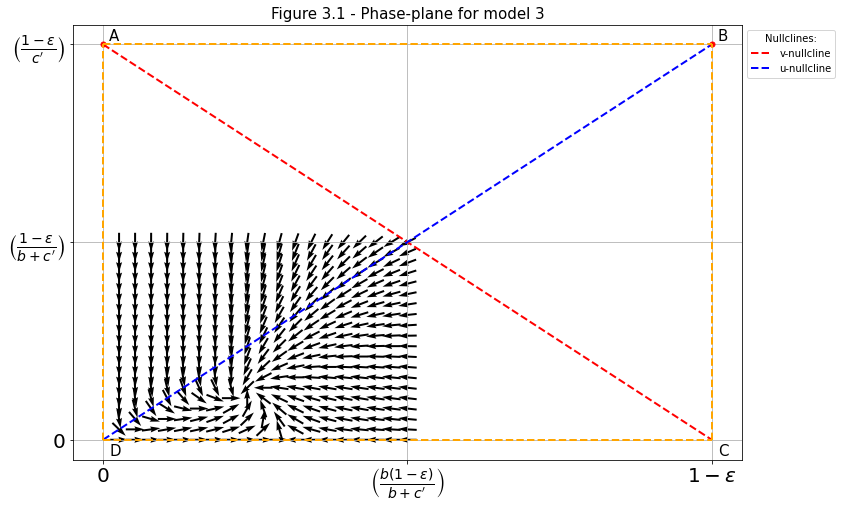

In [473]:
#plot
from IPython.display import display, Math
fig2 = plt.figure(figsize=(12,8))
ax4 = fig2.add_subplot(1,1,1)

x = np.linspace(0,1,20)
y = np.arange(0,1,20)

# plot nullclines
ax4.plot([0,2],[2,0], 'r--', lw=2, label='v-nullcline')
ax4.plot([0,2],[0,2], 'b--', lw=2, label='u-nullcline')

# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 5.0)
ax4.set_title("Figure 3.1 - Phase-plane for model 3",fontsize=15)
#ax4.legend(title='Nullclines:', bbox_to_anchor=(1.05, 1))
ax4.plot(0,2,"red",marker="o",markersize=5.0)
ax4.plot(2,2,"red",marker="o",markersize=5.0)
xlabels = [item.get_text() for item in ax4.get_xticklabels()]
xlabels[0],xlabels[1],xlabels[2] = '0', r"$\left(\frac{b(1 - \epsilon)}{b+c'}\right)$", r"$1 - \epsilon$"
ax4.set_xticklabels(xlabels)
ax4.tick_params(axis='both', which='major', labelsize=20)

ylabels = [item.get_text() for item in ax4.get_yticklabels()]
ylabels[0],ylabels[1],ylabels[2] = '0', r"$\left(\frac{1 - \epsilon}{b+c'}\right)$", r"$\left(\frac{1 - \epsilon}{c'}\right)$"
ax4.set_yticklabels(ylabels)
ax4.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(np.arange(0,3,1))
plt.yticks(np.arange(0,3,1))
ax4.text(0.02, 2.02, r'A', fontsize=15)
ax4.text(2.02, -0.08, r'C', fontsize=15)
ax4.text(2.02, 2.02, r'B', fontsize=15)
ax4.text(0.02, -0.08, r'D', fontsize=15)
ax4.plot([0,2],[2,2],color='orange',linestyle='--',linewidth=2)
ax4.plot([2,2],[0,2],color='orange',linestyle='--',linewidth=2)
ax4.plot([0,0],[0,2],color='orange',linestyle='--',linewidth=2)
ax4.plot([0,2],[0,0],color='orange',linestyle='--',linewidth=2)
# quiverplot
# define a grid and compute direction at each point
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, pivot='mid')
ax4.grid()
ax4.legend(title='Nullclines:', bbox_to_anchor=(1., 1));


